In [142]:
import os
import numpy as np
import pandas as pd
from pandas import Timestamp
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [155]:
# Load data

customer = pd.read_csv('customer_data.csv')
customer_paywall = pd.read_csv('customer_data_paywall.csv')
daily_revenue = pd.read_csv('daily_revenue.csv')
purchase = pd.read_csv('app_purchase.csv')
abtest = pd.read_csv('AB_testing_result.csv')

In [17]:
# the records of ALL customers

customer.head(5)
#len(customer)

,uid,reg_date,device,gender,country,age
0,54030035.0,2017-06-29T00:00:00Z,and,M,USA,19
1,72574201.0,2018-03-05T00:00:00Z,iOS,F,TUR,22
2,64187558.0,2016-02-07T00:00:00Z,iOS,M,USA,16
3,92513925.0,2017-05-25T00:00:00Z,and,M,BRA,41
4,99231338.0,2017-03-26T00:00:00Z,iOS,M,FRA,59


In [14]:
daily_revenue.head(5)

,index,gender,device,revenue,date,country
0,1,male,ios,186557.0,2013-09-20T00:00:00Z,USA
1,2,male,ios,177217.0,2013-09-21T00:00:00Z,USA
2,3,male,ios,177197.0,2013-09-22T00:00:00Z,USA
3,4,male,ios,157193.0,2013-09-23T00:00:00Z,USA
4,5,male,ios,165592.0,2013-09-24T00:00:00Z,USA


In [154]:
purchase.head()

,date,uid,sku,price
0,2017-07-10,41195147,sku_three_499,499
1,2017-07-15,41195147,sku_three_499,499
2,2017-11-12,41195147,sku_four_599,599
3,2017-09-26,91591874,sku_two_299,299
4,2017-12-01,91591874,sku_four_599,599


In [9]:
abtest.head()

,uid,country,gender,spent,purchases,date,group,device
0,11115722,MEX,F,1595,5,2016-03-08,GRP B,I
1,11122053,USA,M,498,2,2017-07-14,GRP B,I
2,11128688,USA,F,2394,6,2017-09-17,GRP A,I
3,11130578,USA,F,1197,3,2017-11-30,GRP A,I
4,11130759,ESP,M,1297,3,2018-01-10,GRP B,A


In [13]:
# the records of customers who had made purchases

customer_paywall.head()
#len(customer_paywall)

,uid,reg_date,device,gender,country,age
0,52774929,2018-03-07T00:00:00Z,and,F,FRA,27
1,40143397,2016-07-02T00:00:00Z,and,F,DEU,56
2,89856430,2017-06-05T00:00:00Z,and,M,TUR,31
3,76188504,2016-09-24T00:00:00Z,iOS,M,BRA,54
4,76493748,2017-06-07T00:00:00Z,iOS,M,BRA,24


In [114]:
# merged tables
purchase_data = customer.merge(purchase, how = 'inner', on = 'uid').sort_values(by = ['uid','date'],ascending=True)
purchase_data.head()


,uid,reg_date,device,gender,country,age,date,sku,price
7695,11158549.0,2016-11-09T00:00:00Z,and,F,BRA,18,2017-09-25,sku_three_499,499
7696,11158549.0,2016-11-09T00:00:00Z,and,F,BRA,18,2017-12-02,sku_four_599,599
7697,11158549.0,2016-11-09T00:00:00Z,and,F,BRA,18,2018-02-11,sku_four_599,599
7698,11158549.0,2016-11-09T00:00:00Z,and,F,BRA,18,2018-03-13,sku_two_299,299
7699,11158549.0,2016-11-09T00:00:00Z,and,F,BRA,18,2018-03-16,sku_two_299,299


In [115]:
# Some EDA: calculate some aggregated metrics group by categorical data

by_device = purchase_data.groupby(by = 'device')['price'].mean().round(2)
by_device.head()

device
and    408.11
iOS    404.82
Name: price, dtype: float64

In [28]:
by_country =purchase_data.groupby(by='country')['price'].mean().round(2).sort_values(ascending=False) 
by_country.head()

country
TUR    415.42
BRA    409.84
DEU    409.05
USA    403.71
FRA    401.76
Name: price, dtype: float64

In [117]:
by_country_device = purchase_data.groupby(by=['country','device']).agg({'price':['mean','median','std','min','max'],
                                                                            'age':['mean','median','std','min','max']})
by_country_device.head(20)

price                                    age         \
                      mean median         std min  max       mean median   
country device                                                             
BRA     and     412.985594  499.0  190.280551  99  899  23.913565   21.0   
        iOS     404.739300  299.0  193.457090  99  899  23.975681   22.0   
CAN     and     406.826087  499.0  187.210190  99  899  23.282609   20.0   
        iOS     386.573964  299.0  183.936864  99  899  25.023669   19.0   
DEU     and     402.474903  299.0  182.045891  99  899  23.814672   21.0   
        iOS     417.639798  499.0  172.928326  99  899  20.773300   17.0   
FRA     and     418.377163  499.0  190.499051  99  899  23.200692   21.0   
        iOS     382.921569  299.0  180.158268  99  899  24.407843   22.0   
TUR     and     433.913793  499.0  197.797792  99  899  24.004310   21.0   
        iOS     390.176471  299.0  185.726108  99  899  22.591176   22.0   
USA     and     399.000000  299.0  183.268944  99  899  24.564738   22.0   
        iOS     410.684783  499.0  191.596076  99  899  24.144022   21.0   

                                   
                      std min max  
country device                     
BRA     and      8.271430  15  62  
        iOS      8.933727  15  66  
CAN     and      9.051196  15  49  
        iOS     11.841690  15  57  
DEU     and      9.059465  15  66  
        iOS      6.549269  15  42  
FRA     and      8.036021  15  55  
        iOS      9.160336  15  59  
TUR     and      8.682048  15  56  
        iOS      7.611545  15  51  
USA     and      9.196706  15  65  
        iOS     10.246104  15  75

In [116]:
# latest purchase date for each purchased customer

purchase_data.groupby(by = 'uid')['date'].max().sort_values(ascending=False)

# or just use the max() function
purchase_data['date'].max()

# The latest purchase happend on 2018-04-21

'2018-04-21'

Calculate some KPIs

In [128]:
# Goal: examine the KPI of user conversion rate after the free trial
# Specifically, the week one conversion rate: the converted users in their first week after the trail ends

# To calculate the conversion rate, we need the number of users who ends free trials, the time they ends free trails, and the number of users who converted within a week of the free trials. 

current_date = pd.to_datetime('2018-04-21')

# latest purchase date is one month from latest date (current date)
max_purchase_date = (current_date - timedelta(days = 28)).date()

# converting the datasets' date col format to date
# purchase_data['reg_date'] = pd.to_datetime(purchase_data['reg_date']).dt.date
# purchase_data['date'] = pd.to_datetime(purchase_data['date']).dt.date

# Need to meet 2 criterias:
# 1. Only include purchases for the customers who registrated before the deadline (max purchase date)
# AND
# 2. Only include purchases that were made within the first 28 days of registration
purchase_date_filter = purchase_data[purchase_data['reg_date']< max_purchase_date]
purchase_date_filter = purchase_date_filter[(purchase_date_filter.date <= purchase_date_filter.reg_date + timedelta(days = 28))]
purchase_date_filter.sort_values(by = ['uid','date'], ascending=True)

# This will return a list of records for users who made purchases within 28 days of registration

# print the average price for those purchases
# print(purchase_date_filter.price.mean())




,uid,reg_date,device,gender,country,age,date,sku,price,month1
8895,11317978.0,2017-10-08,and,M,USA,34,2017-10-27,sku_three_499,499,499.0
6885,11320369.0,2016-04-03,and,F,BRA,15,2016-04-21,sku_four_599,599,599.0
8558,11604973.0,2017-02-02,and,F,USA,16,2017-02-02,sku_seven_1499,499,499.0
7772,11668937.0,2018-02-02,and,M,BRA,19,2018-02-10,sku_three_499,499,499.0
6141,11935439.0,2016-07-16,and,M,BRA,18,2016-08-06,sku_three_499,499,499.0
...,...,...,...,...,...,...,...,...,...,...
4737,99467977.0,2016-06-24,and,F,USA,51,2016-07-02,sku_four_599,599,599.0
3968,99561013.0,2017-10-01,iOS,F,TUR,18,2017-10-14,sku_three_499,499,499.0
3167,99811155.0,2016-12-23,and,M,USA,23,2017-01-02,sku_three_499,499,499.0
4324,99959300.0,2017-12-07,and,M,USA,34,2017-12-22,sku_one_199,199,199.0


In [129]:
# Average purchase by cohort

# Set the max registration date to be one month before today
current_date = pd.to_datetime('2018-04-21')
max_reg_date = (current_date - timedelta(days=28)).date()

# Find the month 1 values (using numpy WHERE/IF statement)
month1 = np.where((purchase_data['reg_date'] < max_reg_date) & (purchase_data['date'] < purchase_data['reg_date'] + timedelta(days = 28)), purchase_data.price, np.NaN)

# Update the value in the DataFrame 
purchase_data['month1'] = month1

# Group the data by gender and device and aggregate the month 1 and price
purchase_summary = purchase_data.groupby(by=['gender', 'device'], as_index=0).agg(
                        {'month1': ['mean', 'median','std','count'],
                        'price': ['mean', 'median','std','count']})


# Examine the results 
print(purchase_summary)

  gender device      month1                                price         \
                       mean median         std count        mean median   
0      F    and  390.758242  299.0  180.509368   182  400.747504  299.0   
1      F    iOS  429.434783  499.0  190.124314   138  404.435330  299.0   
2      M    and  417.285714  499.0  199.733813   175  416.237308  499.0   
3      M    iOS  434.398230  499.0  186.566894   113  405.272401  299.0   

                     
          std count  
0  179.984378  2804  
1  181.524952  1987  
2  195.001520  2541  
3  196.843197  1674  


Some EDA techniques
Work with time series data to look for trends

In [ ]:
# Parsing Dates

# Can convert timestamp or other formats into dates when import CSV - 'parse_dates', 'infer_datetome_format'
pd.read_csv('customer.csv', parse_dates=True, infer_datetime_format=True)

In [ ]:
# use panda to_datetime() function

pd.to_datetime()

In [133]:
date_data_one = ['Saturday January 27, 2017', 'Saturday December 2, 2017']
# Provide the correct format for the date
date_data_one = pd.to_datetime(date_data_one, format='%A %B %d, %Y')
date_data_one

# Saturday January 27, 2017

DatetimeIndex(['2017-01-27', '2017-12-02'], dtype='datetime64[ns]', freq=None)

In [131]:
date_data_two = ['2017-01-01', '2016-05-03']
# Provide the correct format for the date
date_data_two = pd.to_datetime(date_data_two, format="%Y-%m-%d")
print(date_data_two)

# 2017-08-01

DatetimeIndex(['2017-01-01', '2016-05-03'], dtype='datetime64[ns]', freq=None)


In [134]:
date_data_three = ['08/17/1978', '01/07/1976']
# Provide the correct format for the date
date_data_three = pd.to_datetime(date_data_three, format="%m/%d/%Y")
print(date_data_three)

#08/17/1978

DatetimeIndex(['1978-08-17', '1976-01-07'], dtype='datetime64[ns]', freq=None)


In [135]:
date_data_four = ['2016 March 01 01:56', '2016 January 4 02:16']
date_data_four = pd.to_datetime(date_data_four, format='%Y %B %d %H:%M')
print(date_data_four)

#2016 March 01 01:56

DatetimeIndex(['2016-03-01 01:56:00', '2016-01-04 02:16:00'], dtype='datetime64[ns]', freq=None)


Plot some metrics to track trends

In [139]:
# Could no run because the fisrt_week_purchases is not defined

# Group the data and aggregate first_week_purchases
user_purchases = purchase_data.groupby(by=['reg_date']).agg({'first_week_purchases': ['sum']})

# Reset the indexes
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

# Find the average number of purchases per day by first-week users
user_purchases = user_purchases.groupby(by=['reg_date']).agg({'first_week_purchases': ['mean']})
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

# Plot the results
user_purchases.plot(x='reg_date', y='first_week_purchase')
plt.show()

KeyError: "Column(s) ['first_week_purchases'] do not exist"

In [ ]:
# Pivot table (COULD NOT RUN)

country_pivot = pd.pivot_table(user_purchases_country, values=['reg_date'], columns=['country'], index=['reg_date'])
print(country_pivot.head())

In [ ]:
# plot the line charts by cohorts

country_pivot.plot(x='reg_date', y=['USA', 'CAN', 'FRA', 'BRA', 'TUR', 'DEU'])
plt.show()

Smoothing Techniques

Correcting for seasonality/day of week effect with trailing averages.
    Trailing average: smoothing technique that average over a lagging window.
    7-day window to smooth weekly seasonality.

Smoothing with an exponential moving average.
    Exponential moving average: weighted moving (rolling) average, reveals treads by pulling towards the central tendency. 
    Applied weights according to an exponential distribution -- weights the more recent values relative to the window more heavily.
    Averages back to a central trend without masking any recent movements.

.rolling()
.ewm()

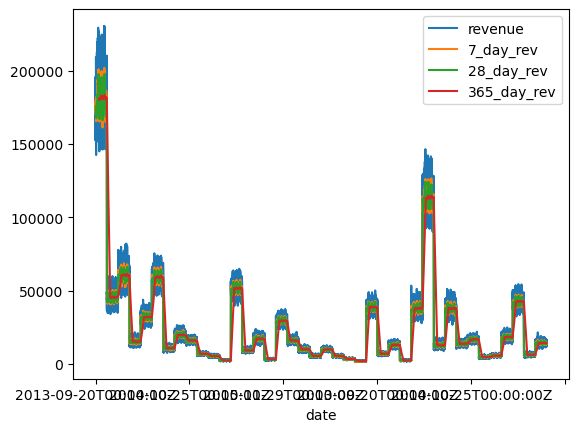

In [143]:
# Compute 7_day_rev
daily_revenue['7_day_rev'] = daily_revenue.revenue.rolling(window=7,center=False).mean()

# Compute 28_day_rev
daily_revenue['28_day_rev'] = daily_revenue.revenue.rolling(window=28,center=False).mean()
    
# Compute 365_day_rev
daily_revenue['365_day_rev'] = daily_revenue.revenue.rolling(window=365,center=False).mean()
    
# Plot date, and revenue, along with the 3 rolling functions (in order)    
daily_revenue.plot(x='date', y=['revenue', '7_day_rev', '28_day_rev', '365_day_rev', ])
plt.show()

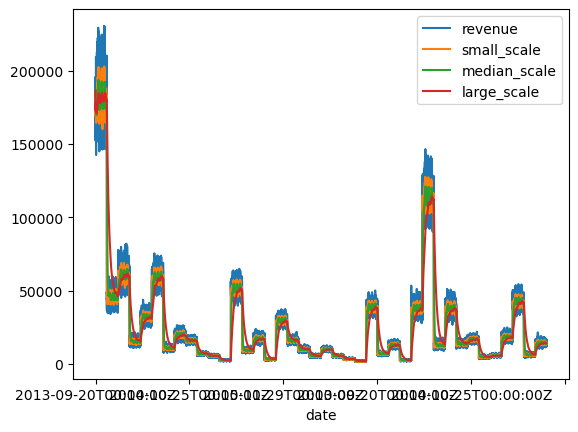

In [ ]:
# Smoothing using the exponential moving average
# The larger the span, the more smooth out of the data

# Calculate 'small_scale'
daily_revenue['small_scale'] = daily_revenue.revenue.ewm(span = 10).mean()

# Calculate 'medium_scale'
daily_revenue['medium_scale'] = daily_revenue.revenue.ewm(span = 100).mean()

# Calculate 'large_scale'
daily_revenue['large_scale'] = daily_revenue.revenue.ewm(span = 500).mean()

# Plot 'date' on the x-axis and, our three averages and 'revenue'
# on the y-axis
daily_revenue.plot(x='date', y = ['revenue', 'small_scale', 'medium_scale', 'large_scale'])
plt.show()

In [146]:
# Create pivot table and plot line chart for each cohort (cannot run)
# Pivot user_revenue 
pivoted_data = pd.pivot_table(user_revenue, values ='revenue', columns=['device', 'gender'], index='month')
pivoted_data = pivoted_data[1:(len(pivoted_data) -1 )]

# Create and show the plot
pivoted_data.plot()
plt.show()

KeyError: 'month'

A/B test: improving the app paywall

Q: Which paywall has a higher conversion rate?



In [150]:
# Extract the 'day'; value from the timestamp
purchase_data.date = pd.to_datetime(purchase_data.date)

# Replace the NaN price values with 0 
purchase_data.price = np.where(np.isnan(purchase_data.price), 0, purchase_data.price)

# Aggregate the data by 'uid' & 'date'
purchase_data_agg = purchase_data.groupby(by=['uid', 'date'], as_index=False)
revenue_user_day = purchase_data_agg.sum()

# Calculate the final average
revenue_user_day = revenue_user_day.price.mean()
print(revenue_user_day)

TypeError: unsupported operand type(s) for +: 'datetime.date' and 'datetime.date'

In [162]:
# Cannot run beacuse datasets not available :( 

# Merge and group the datasets
purchase_data = demographics_data.merge(paywall_views,  how='inner', on=['uid'])
purchase_data.date = purchase_data.date.dt.floor('d')
print(purchase_data)

# Group and aggregate our combined dataset 
daily_purchase_data = purchase_data.groupby(by=['date'], as_index=False)
daily_purchase_data = daily_purchase_data.agg({'purchase': ['sum', 'count']})
print(daily_purchase_data)

# Find the mean of each field and then multiply by 1000 to scale the result
daily_purchases = daily_purchase_data.purchase['sum'].mean()
daily_paywall_views = daily_purchase_data.purchase['count'].mean()

print(daily_purchases)
print(daily_paywall_views)


          uid              reg_date device gender country  age        date  \
0  92513925.0  2017-05-25T00:00:00Z    and      M     BRA   41  2017-10-20   
1  92513925.0  2017-05-25T00:00:00Z    and      M     BRA   41  2017-05-29   
2  92513925.0  2017-05-25T00:00:00Z    and      M     BRA   41  2017-08-23   
3  92513925.0  2017-05-25T00:00:00Z    and      M     BRA   41  2018-03-26   
4  16377492.0  2016-10-16T00:00:00Z    and      M     BRA   20  2018-03-17   

             sku  price  
0  sku_three_499    499  
1    sku_two_299    299  
2   sku_four_599    599  
3   sku_six_1299    299  
4    sku_one_199    199  


,uid,reg_date,device,gender,country,age,date,sku,price
7695,11158549.0,2016-11-09T00:00:00Z,and,F,BRA,18,2017-09-25,sku_three_499,499
7696,11158549.0,2016-11-09T00:00:00Z,and,F,BRA,18,2017-12-02,sku_four_599,599
7697,11158549.0,2016-11-09T00:00:00Z,and,F,BRA,18,2018-02-11,sku_four_599,599
7698,11158549.0,2016-11-09T00:00:00Z,and,F,BRA,18,2018-03-13,sku_two_299,299
7699,11158549.0,2016-11-09T00:00:00Z,and,F,BRA,18,2018-03-16,sku_two_299,299


In [ ]:
# Calculate the variance & std of the baseline conversion rate (cannot run)

# Find the number of paywall views 
n = purchase_data.purchase.count()

# Calculate the quantitiy "v"
v = conversion_rate * (1 - conversion_rate) 

# Calculate the variance and standard error of the estimate
var = v / n
se = var**0.5

print(var)
print(se)

To reduce sample size 

reduce the variability (variance) of the sample
increase power
decrease the confidence level

In [ ]:
# Compare the impact on sample size by changing the Confidence level

# Look at the impact of sample size increase on power
n_param_one = pd.get_power(n=1000, p1=p1, p2=p2, cl=cl)
n_param_two = pd.get_power(n=2000, p1=p1, p2=p2, cl=cl)

# Look at the impact of confidence level increase on power
alpha_param_one = pd.get_power(n=n1, p1=p1, p2=p2, cl=0.8)
alpha_param_two = pd.get_power(n=n1, p1=p1, p2=p2, cl=0.95)
    
# Compare the ratios
print(n_param_two / n_param_one)
print(alpha_param_one / alpha_param_two)

In [ ]:
# Calcualte sample size

# Merge the demographics and purchase data to only include paywall views
purchase_data = demographics_data.merge(paywall_views, how='inner', on=['uid'])
                            
# Find the conversion rate
conversion_rate = (sum(purchase_data.purchase) / purchase_data.purchase.count())

# Desired Power: 0.8
# CL: 0.90
# Percent Lift: 0.1
p2 = conversion_rate * (1 + 0.1)
sample_size = pd.get_sample_size(0.8, conversion_rate, p2, 0.9)
print(sample_size)

In [173]:
# Distribution of users in each group

#  Find the unique users in each group, by device and gender
results = abtest.groupby(by=['group', 'device', 'gender']).agg({'uid': pd.Series.nunique}) 

# Find the overall number of unique users using "len" and "unique"
unique_users = len(abtest.uid.unique())

# Find the percentage in each group
results = results / unique_users * 100
print(results)

                           uid
group device gender           
GRP A A      F       12.239827
             M       12.795589
      I      F       12.542772
             M       12.568925
GRP B A      F       12.553669
             M       12.499183
      I      F       12.283417
             M       12.516618


In [182]:
# Calculate p-value
from scipy import stats

def get_pvalue(con_conv, test_conv, con_size, test_size):  
    lift =  - abs(test_conv - con_conv)

    scale_one = con_conv * (1 - con_conv) * (1 / con_size)
    scale_two = test_conv * (1 - test_conv) * (1 / test_size)
    scale_val = (scale_one + scale_two)**0.5

    p_value = 2 * stats.norm.cdf(lift, loc = 0, scale = scale_val )

    return p_value

In [186]:
con_conv = 0.1
test_conv = 0.17
con_size = 1000
test_size = 1000

p_value = get_pvalue(con_conv, test_conv, con_size, test_size)
print(p_value)


4.131297741047305e-06


In [187]:
# Calculate Confidence Interval
from scipy import stats

def get_ci(value, cl, sd):
  loc = stats.norm.ppf(1 - cl/2)
  rng_val = stats.norm.cdf(loc - value/sd)

  lwr_bnd = value - rng_val
  upr_bnd = value + rng_val 

  return_val = (lwr_bnd, upr_bnd)
  return(return_val)

In [190]:
# Compute and print the confidence interval
confidence_interval  = get_ci(1, 0.975, 0.5)
print(confidence_interval)

# Compute and print the confidence interval
confidence_interval  = get_ci(1, 0.95, 2)
print(confidence_interval)

# Compute and print the confidence interval
confidence_interval  = get_ci(1, 0.95, 0.001)
print(confidence_interval)

(0.9755040421682946, 1.0244959578317054)
(0.6690506448818785, 1.3309493551181215)
(1.0, 1.0)


In [191]:
# Calculate the mean of our lift distribution 
lift_mean = test_conv - con_conv 

# Calculate variance and standard deviation 
lift_variance = (1 - test_conv) * test_conv /test_size + (1 - con_conv) * con_conv / con_size
lift_sd = lift_variance**0.5

# Find the confidence intervals with cl = 0.95
confidence_interval = get_ci(lift_mean, 0.95, lift_sd)

print(confidence_interval)

(0.06999721329946497, 0.07000278670053504)


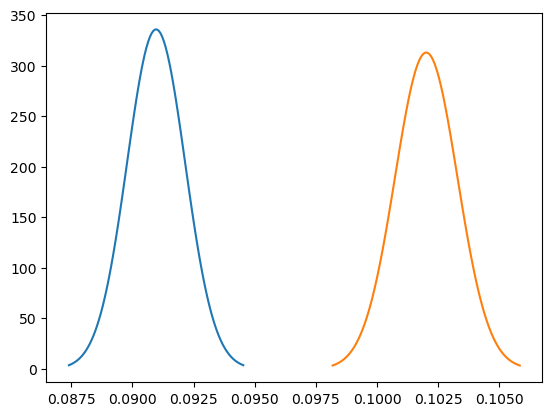

In [ ]:
# Plotting the Distribution of control variable and test variable
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

test_var = 1.6255542142857143e-06
con_var = 1.411507925080655e-06
test_conv = 0.102005
con_conv = 0.090965

# Compute the standard deviations
control_sd = con_var**0.5
test_sd = test_var**0.5

# Create the range of x values 
control_line = np.linspace(con_conv - 3 * control_sd, con_conv + 3 * control_sd, 100)
test_line = np.linspace(test_conv - 3 * test_sd, test_conv + 3 * test_sd, 100)

# Plot the distribution 
plt.plot(control_line, stats.norm.pdf(control_line, con_conv, control_sd))
plt.plot(test_line, stats.norm.pdf(test_line,test_conv,test_sd))
plt.show()

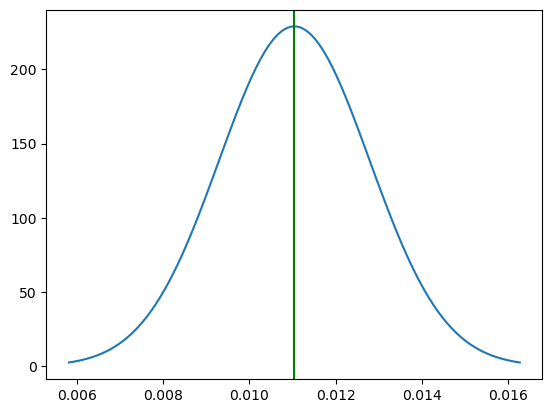

In [195]:
# plot the difference of control and test distribution

# Find the lift mean and standard deviation
lift_mean = test_conv - con_conv
lift_sd = (test_var + con_var)**0.5

# Generate the range of x-values
lift_line = np.linspace(lift_mean - 3*lift_sd, lift_mean + 3*lift_sd,100)

# plot the lift distribution
plt.plot(lift_line, stats.norm.pdf(lift_line, lift_mean, lift_sd))

# add the annotation lines
plt.axvline(x = lift_mean, color = 'green')
plt.show()